In [1]:
### THROUGHOUT:
### DONE - meaningful variable names
### DONE - thorough comments that explain the code
### DONE - general housekeeping
### DONE - if possible, reorder columns
### DONE - if possible, bypass writing XML; if cannot, make more meaningful name/location
### DONE - FULL STOP: commit and submit pull request
### - reimplement core steps as functions: start with 2 big ones and try to do subfunctions from there
### - write in some broader level narrative using markdown cells
### - work on doing some plotting in R - ideally take advantage of SoS and pass dataframe directly to an R cell, but if we need to use an intermediate file then thats okay too.
### - calculate some summary statistics in R too. We have been focused on assembly length, but understanding distributions of other attributes is meaningful as well
### - also just knowing the counts of genomes and very basic stuff is good too

In [5]:
# importing the required modules 
import csv 
import requests 
import xml.etree.ElementTree as ET
import pandas as pd

In [6]:
# url for all assemblies
url = 'https://www.ebi.ac.uk/ena/data/view/Taxon:8782&portal=assembly&subtree=true&display=xml'
print(url)

https://www.ebi.ac.uk/ena/data/view/Taxon:8782&portal=assembly&subtree=true&display=xml


In [7]:
# create element tree object based on XML at URL
tree = ET.fromstring(requests.get(url).content)

In [8]:
# Retreiving all GCA ids through parsing and word search and saving to a list.
GCA_list=[]
for node in tree.findall('.//IDENTIFIERS'):
    for snode in node.getchildren():
        if snode.tag == "PRIMARY_ID":
            word=snode.text
            if (word.find('GCA') != -1): 
                print (word) 
                GCA_list.append(word)

GCA_000002315.5
GCA_000146605.3
GCA_000151805.2
GCA_000238935.1
GCA_000247815.2
GCA_000277835.1
GCA_000331425.1
GCA_000332375.1
GCA_000337935.2
GCA_000337955.1
GCA_000337975.1
GCA_000355885.1
GCA_000385455.1
GCA_000400545.1
GCA_000400695.1
GCA_000511605.2
GCA_000534875.1
GCA_000586395.1
GCA_000599465.2
GCA_000599485.1
GCA_000687185.1
GCA_000687205.1
GCA_000687265.1
GCA_000687285.1
GCA_000687375.1
GCA_000690535.1
GCA_000690715.1
GCA_000690775.1
GCA_000690835.1
GCA_000690875.1
GCA_000691405.1
GCA_000691785.1
GCA_000691845.1
GCA_000691975.1
GCA_000692015.2
GCA_000692075.1
GCA_000695195.1
GCA_000695765.1
GCA_000695815.1
GCA_000696035.1
GCA_000696875.1
GCA_000698965.1
GCA_000699005.1
GCA_000699085.1
GCA_000699105.1
GCA_000699145.1
GCA_000699245.1
GCA_000699545.1
GCA_000699945.1
GCA_000700745.1
GCA_000703405.1
GCA_000705375.2
GCA_000708025.2
GCA_000708225.1
GCA_000708925.1
GCA_000709325.1
GCA_000709365.1
GCA_000709895.1
GCA_000710305.1
GCA_000737465.1
GCA_000738735.2
GCA_000747805.1
GCA_0007

/Users/darencard/anaconda3/envs/sos/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  after removing the cwd from sys.path.


In [9]:
# Retreiving xml for each assembly.
# This section iterates each GCA ID retreived in the previous step into a URL designed to query 
# the EBI database for the matching assembly metadata. The resulting XML is then parsed using
# ET to extract the desired assembly metadata

# initialize empty metadata list for results
metadata_list=[]
# for each GCA in the GCA list
for GCA in range(0, len(GCA_list)):
    
    # construct URL with the appropriate GCA ID
    url = 'https://www.ebi.ac.uk/ena/data/view/'+GCA_list[GCA]+'&display=xml'
        
    # create element tree object based on XML at URL
    tree = ET.fromstring(requests.get(url).content)
    
    # Retreiving GCA id and sample id and saving to list
    # temporary list to hold primary IDs, which are then parsed
    ID=[]
    for node in tree.findall('.//IDENTIFIERS'):
        for snode in node.getchildren():
           # print(snode.tag, snode.text)
            if snode.tag == "PRIMARY_ID":
                ID.append(snode.text)
    
    # parse the desired metadata
    gca_id = ID[0] # The GCA id
    sample_id = ID[1] #The sample acession
    
    # Append to the list a tuple of form (assembly index, GCA ID, sample ID)
    metadata_list.append((GCA, 'gca_id', gca_id))
    metadata_list.append((GCA, 'sample_id', sample_id))
    
    # Retreiving the taxon id and scientific name and saving to list.
    # temporary list to hold primary IDs, which are then parsed
    taxon=[]
    for node in tree.findall('.//TAXON'):
        for snode in node.getchildren():
            taxon.append(snode.text)
   
    # parse the desired metadata
    taxon_id = taxon[0] # The taxon id
    taxon_name = taxon[1] # The scientific name
    
    # Append to the list a tuple of form (assembly index, taxon ID, taxon name)
    metadata_list.append((GCA, 'taxon_id', taxon_id))
    metadata_list.append((GCA, 'taxon_name', taxon_name))
    
    # Retreiving all metadata fields by parsing all Assembly_Attribute subnodes and retreving TAGs and VALUEs
    # first parse the tags based on input order and add to list
    tags=[]
    for node in tree.findall('.//ASSEMBLY_ATTRIBUTE'):
        for snode in node.getchildren():
            if snode.tag == "TAG": # pull out only "TAG" nodes
                key=snode.text
                tags.append(key)
    
    # then parse the values based in input order (same as tags) and add to list
    values=[]            
    for node in tree.findall('.//ASSEMBLY_ATTRIBUTE'):
        for snode in node.getchildren():
            if snode.tag == "VALUE": # pull out only "VALUE" nodes
                value=snode.text
                values.append(value)
                
    # iterate through tag/value list by index number (1-N)
    # and append values to the list
    for tag in range(0, len(tags)):
        # Append to the list a tuple of form (assembly index, TAG, VALUE)
        metadata_list.append((GCA, tags[tag], values[tag]))

print(metadata_list)

/Users/darencard/anaconda3/envs/sos/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/Users/darencard/anaconda3/envs/sos/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/Users/darencard/anaconda3/envs/sos/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/Users/darencard/anaconda3/envs/sos/lib/python3.7/site-packages/ipykernel_launcher.py:61: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


[(0, 'gca_id', 'GCA_000002315.5'), (0, 'sample_id', 'SAMN02981218'), (0, 'taxon_id', '9031'), (0, 'taxon_name', 'Gallus gallus'), (0, 'total-length', '1065348650'), (0, 'ungapped-length', '1055564190'), (0, 'n50', '20785086'), (0, 'spanned-gaps', '878'), (0, 'unspanned-gaps', '68'), (0, 'scaffold-count', '524'), (0, 'count-contig', '1402'), (0, 'contig-n50', '17655422'), (0, 'contig-L50', '19'), (0, 'contig-n75', '9688072'), (0, 'contig-n90', '2759626'), (0, 'scaf-L50', '12'), (0, 'scaf-n75', '12763716'), (0, 'scaf-n90', '6153034'), (0, 'replicon-count', '34'), (0, 'count-non-chromosome-replicon', '0'), (0, 'count-alt-loci-units', '0'), (0, 'count-regions', '0'), (0, 'count-patches', '0'), (0, 'ENA-LAST-UPDATED', '2018-12-05'), (1, 'gca_id', 'GCA_000146605.3'), (1, 'sample_id', 'SAMN02981253'), (1, 'taxon_id', '9103'), (1, 'taxon_name', 'Meleagris gallopavo'), (1, 'total-length', '1128339136'), (1, 'ungapped-length', '1093044709'), (1, 'n50', '3801642'), (1, 'spanned-gaps', '62525'), (

In [10]:
# Convert list of tuples to a pandas data frame.
# test=metadata_list[0:64]
metadata_df = pd.DataFrame(metadata_list)
print(metadata_df)

        0                              1                2
0       0                         gca_id  GCA_000002315.5
1       0                      sample_id     SAMN02981218
2       0                       taxon_id             9031
3       0                     taxon_name    Gallus gallus
4       0                   total-length       1065348650
...   ...                            ...              ...
4607  192  count-non-chromosome-replicon                0
4608  192           count-alt-loci-units                0
4609  192                  count-regions                0
4610  192                  count-patches                0
4611  192               ENA-LAST-UPDATED       2019-07-12

[4612 rows x 3 columns]


In [11]:
# store a list with the desired column ordering for re-ordering pivot table below
order=metadata_df[1].unique()
# Use pivot function to arrange data into indexed rows with the tags as columns
# and values as cells, and re-arrange columns to be in same order as input
metadata_df_final=metadata_df.pivot(index=0, columns=1, values=2).reindex(columns=order)
print(metadata_df_final)

1             gca_id     sample_id taxon_id                    taxon_name  \
0                                                                           
0    GCA_000002315.5  SAMN02981218     9031                 Gallus gallus   
1    GCA_000146605.3  SAMN02981253     9103           Meleagris gallopavo   
2    GCA_000151805.2  SAMN02981239    59729           Taeniopygia guttata   
3    GCA_000238935.1  SAMN02981360    13146       Melopsittacus undulatus   
4    GCA_000247815.2  SAMN02981387    59894           Ficedula albicollis   
..               ...           ...      ...                           ...   
188  GCA_900560995.1  SAMEA4890637   474924         Seicercus examinandus   
189  GCA_900561015.1  SAMEA4890638   474924         Seicercus examinandus   
190  GCA_901699155.1   SAMEA994735   177155           Streptopelia turtur   
191  GCA_901699165.1   SAMEA994735   177155           Streptopelia turtur   
192  GCA_902153765.1   SAMEA994725   223781  Aquila chrysaetos chrysaetos   

In [12]:
#converting DataFrame into \ seperated .csv file.
metadata_df_final.to_csv('bird_genome_metadata.txt', index=False, sep="\t")

In [44]:
metadata_df_final
%put metadata_df_final

UsageError: Line magic function `%put` not found.


In [26]:
%get metadata_df_final --from python3
metadata_df_final

Subkernel python3 does not support magic %put.


ERROR: Error in eval(expr, envir, enclos): object 'metadata_df_final' not found


In [41]:
%get metadata_df_final --from R
metadata_df_final


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
script_7866736420516412653 in <module>
----> metadata_df_final

NameError: name 'metadata_df_final' is not defined


In [37]:
%get mtcars --from R
mtcars=mtcars

NameError: name 'mtcars' is not defined

In [48]:
metadata_df_final <- read.table("bird_genome_metadata.txt", header=TRUE, sep="\t")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 20 rows containing non-finite values (stat_bin).”


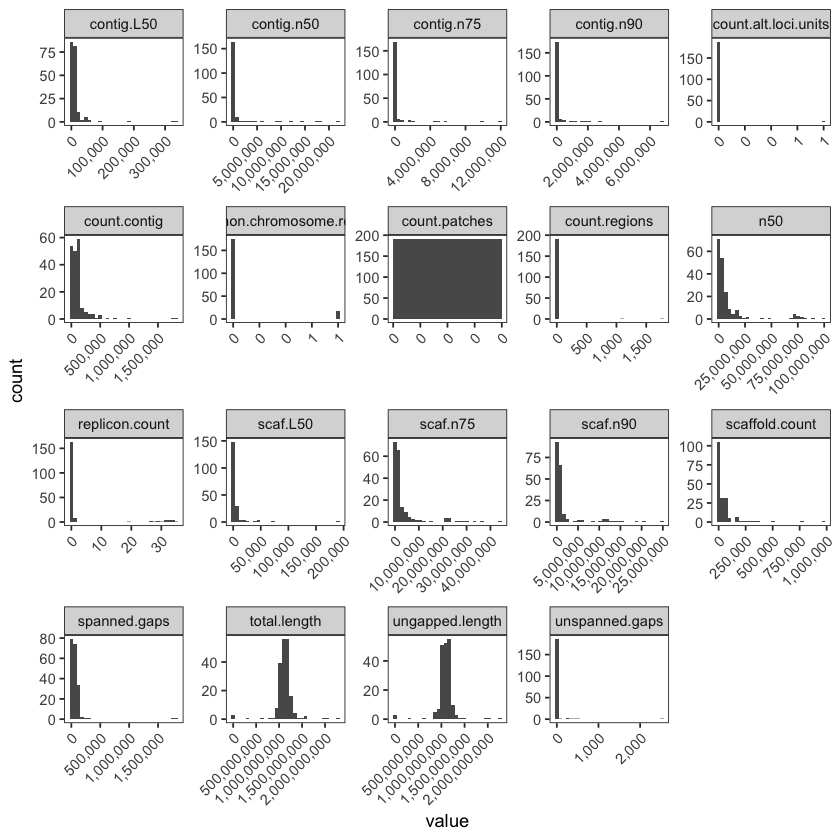

In [68]:
library(tidyverse)
metadata_df_final %>% 
gather("measure", "value", total.length:count.patches) %>% 
ggplot(aes(x=value)) +
geom_histogram() +
facet_wrap(~measure, scales="free") +
scale_x_continuous(labels = scales::comma) +
theme_bw() +
theme(axis.text.x=element_text(angle=45, hjust=1),
     panel.grid=element_blank())